In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


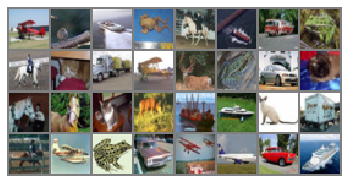

plane bird  ship  frog  horse ship  truck frog  horse cat   truck plane deer  frog  car   dog   horse horse cat   deer  ship  ship  cat   truck horse plane frog  car   plane plane car   ship 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [19]:
class MemNet(nn.Module):
    def __init__(self, num_classes=10):
        super(MemNet, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 200, 5),
            nn.BatchNorm2d(200),
            nn.ReLU(),
            nn.MaxPool2d(3)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(200, 200, 5),
            nn.BatchNorm2d(200),
            nn.ReLU(),
            nn.MaxPool2d(3)
        )
        
        self.dense1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(200, 384),
            nn.BatchNorm1d(384),
            nn.ReLU(),
        )
        
        self.dense2 = nn.Sequential(
            nn.Linear(384, 192),
            nn.BatchNorm1d(192),
            nn.ReLU(),
        )
        
        self.dense3 = nn.Sequential(
            nn.Linear(192, num_classes),
            nn.Softmax()
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x

In [20]:
num_epochs = 100
init_lr = 0.01

model = MemNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=init_lr, momentum = 0.9)  

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.5)

In [24]:
total_step = len(trainloader)

for epoch in range(num_epochs):
    for i, (images, labels) in tqdm(enumerate(trainloader)):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    scheduler.step() 
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

1563it [00:10, 145.30it/s]

Epoch [1/100], Step [1563/1563], Loss: 1.6060



1563it [00:11, 140.78it/s]

Epoch [2/100], Step [1563/1563], Loss: 1.6837



1563it [00:11, 136.78it/s]

Epoch [3/100], Step [1563/1563], Loss: 1.5236



1563it [00:11, 137.84it/s]

Epoch [4/100], Step [1563/1563], Loss: 1.6056



1563it [00:11, 135.79it/s]

Epoch [5/100], Step [1563/1563], Loss: 1.5842



1563it [00:11, 137.90it/s]

Epoch [6/100], Step [1563/1563], Loss: 1.7080



1563it [00:10, 142.09it/s]

Epoch [7/100], Step [1563/1563], Loss: 1.5442



1563it [00:11, 135.65it/s]

Epoch [8/100], Step [1563/1563], Loss: 1.6364



1563it [00:11, 141.01it/s]

Epoch [9/100], Step [1563/1563], Loss: 1.5320



1563it [00:11, 138.36it/s]

Epoch [10/100], Step [1563/1563], Loss: 1.5407



1563it [00:11, 140.91it/s]

Epoch [11/100], Step [1563/1563], Loss: 1.6586



1563it [00:11, 140.94it/s]

Epoch [12/100], Step [1563/1563], Loss: 1.5787



1563it [00:11, 136.99it/s]

Epoch [13/100], Step [1563/1563], Loss: 1.5756



1563it [00:11, 137.11it/s]

Epoch [14/100], Step [1563/1563], Loss: 1.6514



1563it [00:10, 143.73it/s]

Epoch [15/100], Step [1563/1563], Loss: 1.4686



1563it [00:11, 138.17it/s]

Epoch [16/100], Step [1563/1563], Loss: 1.7365



1563it [00:11, 140.44it/s]

Epoch [17/100], Step [1563/1563], Loss: 1.5561



1563it [00:11, 141.91it/s]

Epoch [18/100], Step [1563/1563], Loss: 1.5859



1563it [00:11, 135.67it/s]

Epoch [19/100], Step [1563/1563], Loss: 1.6156



1563it [00:11, 140.62it/s]

Epoch [20/100], Step [1563/1563], Loss: 1.4613



1563it [00:11, 137.48it/s]

Epoch [21/100], Step [1563/1563], Loss: 1.4812



1563it [00:11, 140.59it/s]

Epoch [22/100], Step [1563/1563], Loss: 1.4648



1563it [00:11, 140.05it/s]

Epoch [23/100], Step [1563/1563], Loss: 1.4638



1563it [00:11, 138.99it/s]

Epoch [24/100], Step [1563/1563], Loss: 1.5465



1563it [00:11, 136.21it/s]

Epoch [25/100], Step [1563/1563], Loss: 1.5087



1563it [00:11, 141.97it/s]

Epoch [26/100], Step [1563/1563], Loss: 1.5236



1563it [00:10, 143.57it/s]

Epoch [27/100], Step [1563/1563], Loss: 1.5212



1563it [00:11, 135.92it/s]

Epoch [28/100], Step [1563/1563], Loss: 1.5240



1563it [00:11, 139.10it/s]

Epoch [29/100], Step [1563/1563], Loss: 1.5090



1563it [00:11, 141.66it/s]

Epoch [30/100], Step [1563/1563], Loss: 1.5875



1563it [00:11, 140.54it/s]

Epoch [31/100], Step [1563/1563], Loss: 1.4631



1563it [00:11, 141.56it/s]

Epoch [32/100], Step [1563/1563], Loss: 1.4696



1563it [00:11, 139.52it/s]

Epoch [33/100], Step [1563/1563], Loss: 1.4612



1563it [00:11, 138.52it/s]

Epoch [34/100], Step [1563/1563], Loss: 1.5305



1563it [00:11, 140.52it/s]

Epoch [35/100], Step [1563/1563], Loss: 1.5839



1563it [00:11, 140.83it/s]

Epoch [36/100], Step [1563/1563], Loss: 1.4794



1563it [00:11, 135.85it/s]

Epoch [37/100], Step [1563/1563], Loss: 1.4615



1563it [00:10, 142.43it/s]

Epoch [38/100], Step [1563/1563], Loss: 1.5820



1563it [00:11, 139.98it/s]

Epoch [39/100], Step [1563/1563], Loss: 1.4612



1563it [00:11, 141.15it/s]

Epoch [40/100], Step [1563/1563], Loss: 1.5255



1563it [00:11, 135.52it/s]

Epoch [41/100], Step [1563/1563], Loss: 1.5244



1563it [00:11, 139.35it/s]

Epoch [42/100], Step [1563/1563], Loss: 1.5387



1563it [00:10, 142.43it/s]

Epoch [43/100], Step [1563/1563], Loss: 1.6589



1563it [00:11, 138.37it/s]


Epoch [44/100], Step [1563/1563], Loss: 1.5239


1563it [00:11, 140.92it/s]

Epoch [45/100], Step [1563/1563], Loss: 1.5019



1563it [00:11, 140.98it/s]

Epoch [46/100], Step [1563/1563], Loss: 1.5247



1563it [00:11, 141.14it/s]

Epoch [47/100], Step [1563/1563], Loss: 1.4691



1563it [00:11, 137.53it/s]

Epoch [48/100], Step [1563/1563], Loss: 1.4617



1563it [00:11, 136.99it/s]

Epoch [49/100], Step [1563/1563], Loss: 1.4722



1563it [00:11, 137.27it/s]

Epoch [50/100], Step [1563/1563], Loss: 1.4630



1563it [00:10, 142.76it/s]

Epoch [51/100], Step [1563/1563], Loss: 1.5864



1563it [00:11, 139.02it/s]

Epoch [52/100], Step [1563/1563], Loss: 1.4613



1563it [00:11, 136.00it/s]

Epoch [53/100], Step [1563/1563], Loss: 1.4690



1563it [00:11, 138.77it/s]

Epoch [54/100], Step [1563/1563], Loss: 1.6023



1563it [00:11, 141.68it/s]

Epoch [55/100], Step [1563/1563], Loss: 1.4614



1563it [00:11, 140.79it/s]

Epoch [56/100], Step [1563/1563], Loss: 1.5861



1563it [00:10, 143.59it/s]

Epoch [57/100], Step [1563/1563], Loss: 1.5790



1563it [00:11, 140.89it/s]

Epoch [58/100], Step [1563/1563], Loss: 1.4632



1563it [00:11, 138.51it/s]

Epoch [59/100], Step [1563/1563], Loss: 1.4612



1563it [00:10, 142.69it/s]

Epoch [60/100], Step [1563/1563], Loss: 1.7108



1563it [00:11, 139.16it/s]

Epoch [61/100], Step [1563/1563], Loss: 1.5892



1563it [00:11, 138.11it/s]

Epoch [62/100], Step [1563/1563], Loss: 1.4612



1563it [00:10, 144.31it/s]


Epoch [63/100], Step [1563/1563], Loss: 1.4614


1563it [00:11, 140.39it/s]

Epoch [64/100], Step [1563/1563], Loss: 1.5828



1563it [00:10, 142.96it/s]

Epoch [65/100], Step [1563/1563], Loss: 1.5365



1563it [00:10, 142.12it/s]

Epoch [66/100], Step [1563/1563], Loss: 1.6326



1563it [00:11, 139.87it/s]

Epoch [67/100], Step [1563/1563], Loss: 1.4631



1563it [00:11, 137.11it/s]

Epoch [68/100], Step [1563/1563], Loss: 1.6469



1563it [00:11, 136.38it/s]

Epoch [69/100], Step [1563/1563], Loss: 1.4995



1563it [00:10, 142.11it/s]

Epoch [70/100], Step [1563/1563], Loss: 1.5582



1563it [00:10, 143.51it/s]

Epoch [71/100], Step [1563/1563], Loss: 1.5864



1563it [00:11, 141.37it/s]

Epoch [72/100], Step [1563/1563], Loss: 1.5924



1563it [00:10, 143.46it/s]

Epoch [73/100], Step [1563/1563], Loss: 1.5480



1563it [00:11, 140.41it/s]

Epoch [74/100], Step [1563/1563], Loss: 1.4613



1563it [00:10, 144.00it/s]

Epoch [75/100], Step [1563/1563], Loss: 1.5240



1563it [00:10, 143.25it/s]

Epoch [76/100], Step [1563/1563], Loss: 1.4612



1563it [00:11, 141.04it/s]

Epoch [77/100], Step [1563/1563], Loss: 1.5234



1563it [00:11, 141.22it/s]

Epoch [78/100], Step [1563/1563], Loss: 1.6215



1563it [00:10, 143.62it/s]

Epoch [79/100], Step [1563/1563], Loss: 1.4613



1563it [00:10, 142.67it/s]

Epoch [80/100], Step [1563/1563], Loss: 1.4612



1563it [00:11, 141.35it/s]

Epoch [81/100], Step [1563/1563], Loss: 1.4763



1563it [00:11, 142.04it/s]

Epoch [82/100], Step [1563/1563], Loss: 1.4626



1563it [00:11, 135.44it/s]

Epoch [83/100], Step [1563/1563], Loss: 1.5468



1563it [00:11, 141.93it/s]

Epoch [84/100], Step [1563/1563], Loss: 1.5088



1563it [00:11, 138.87it/s]

Epoch [85/100], Step [1563/1563], Loss: 1.4623



1563it [00:10, 142.23it/s]

Epoch [86/100], Step [1563/1563], Loss: 1.6344



1563it [00:11, 141.33it/s]

Epoch [87/100], Step [1563/1563], Loss: 1.5237



1563it [00:11, 141.17it/s]

Epoch [88/100], Step [1563/1563], Loss: 1.4938



1563it [00:11, 134.19it/s]


Epoch [89/100], Step [1563/1563], Loss: 1.5923


1563it [00:10, 147.72it/s]

Epoch [90/100], Step [1563/1563], Loss: 1.4909



1563it [00:10, 144.32it/s]

Epoch [91/100], Step [1563/1563], Loss: 1.5155



1563it [00:10, 147.76it/s]

Epoch [92/100], Step [1563/1563], Loss: 1.5247



1563it [00:11, 138.78it/s]

Epoch [93/100], Step [1563/1563], Loss: 1.5232



1563it [00:11, 139.41it/s]

Epoch [94/100], Step [1563/1563], Loss: 1.4617



1563it [00:11, 138.86it/s]

Epoch [95/100], Step [1563/1563], Loss: 1.5239



1563it [00:10, 145.65it/s]

Epoch [96/100], Step [1563/1563], Loss: 1.4619



1563it [00:11, 140.35it/s]

Epoch [97/100], Step [1563/1563], Loss: 1.4640



1563it [00:11, 136.07it/s]

Epoch [98/100], Step [1563/1563], Loss: 1.4619



1563it [00:10, 142.22it/s]

Epoch [99/100], Step [1563/1563], Loss: 1.6158



1563it [00:10, 144.47it/s]

Epoch [100/100], Step [1563/1563], Loss: 1.5217


In [25]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 71.6 %
Accuracy for class: car   is 80.0 %
Accuracy for class: bird  is 59.9 %
Accuracy for class: cat   is 53.9 %
Accuracy for class: deer  is 65.7 %
Accuracy for class: dog   is 62.7 %
Accuracy for class: frog  is 77.1 %
Accuracy for class: horse is 73.8 %
Accuracy for class: ship  is 77.9 %
Accuracy for class: truck is 76.7 %


In [26]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 69 %


In [27]:
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    n,c,w,h = tensor.shape

    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    rows = np.min((tensor.shape[0] // nrow + 1, 64))    
    grid = torchvision.utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

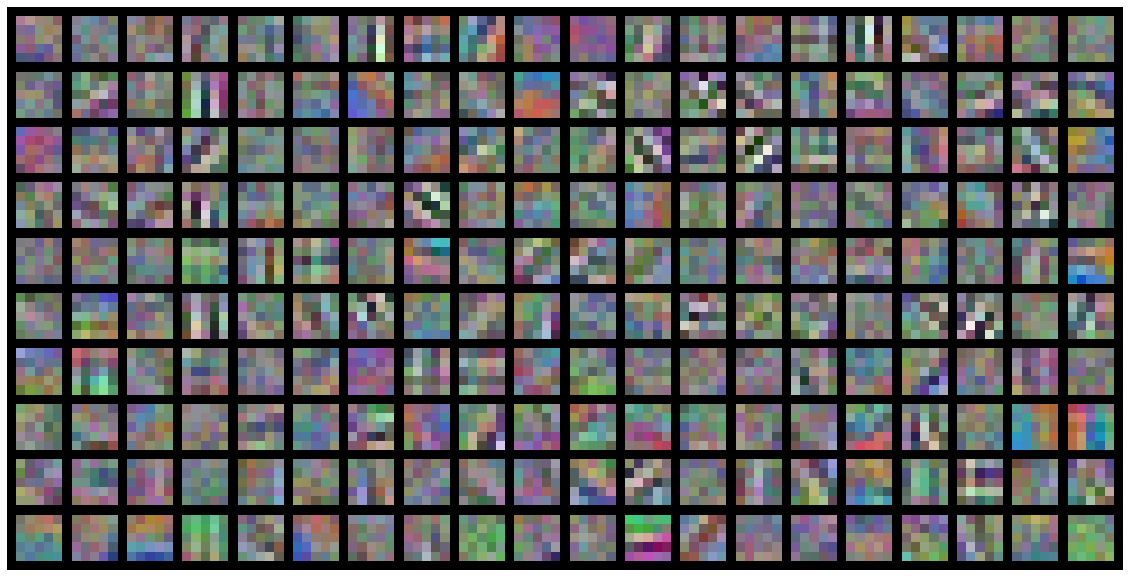

In [30]:
f = model.conv1[0].weight.data.clone().cpu()
visTensor(f, ch=0, allkernels=False, nrow=20)

plt.axis('off')
plt.ioff()
plt.show()

In [31]:
torch.save(model.state_dict(), "mem_net_correct_y.pth")